# Power Rangers Franchise

#TidyTuesday challenge

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pypalettes import load_cmap
from pypalettes import get_hex

## Load data

In [3]:
episodes = pd.read_csv("power_rangers_episodes.csv")
seasons = pd.read_csv("power_rangers_seasons.csv")

In [4]:
# merge season data
df = pd.merge(episodes, seasons, left_on="season_title", right_on="season_title", how="left")
df = df.rename(columns={"IMDB_rating_y": "IMDB_rating_season", "IMDB_rating_x": "IMDB_rating"})

## Viz

## Explore

In [3]:
episodes.columns

Index(['season_title', 'episode_num', 'episode_title', 'air_date',
       'IMDB_rating', 'total_votes', 'desc'],
      dtype='object')

In [6]:
seasons.columns

Index(['season_title', 'season_num', 'number_of_episodes', 'air_date_first_ep',
       'air_date_last_ep', 'producer', 'IMDB_rating'],
      dtype='object')

In [18]:
df.columns

Index(['season_title', 'episode_num', 'episode_title', 'air_date',
       'IMDB_rating_x', 'total_votes', 'desc', 'season_num',
       'number_of_episodes', 'air_date_first_ep', 'air_date_last_ep',
       'producer', 'IMDB_rating_season'],
      dtype='object')

In [22]:
df.groupby(["season_num","season_title"])["episode_num"].max()

season_num  season_title             
1           Mighty Morphin (Season 1)    60
2           Mighty Morphin (Season 2)    52
3           Mighty Morphin (Season 3)    43
4           Zeo                          50
5           Turbo                        45
6           In Space                     43
7           Lost Galaxy                  45
8           Lightspeed Rescue            40
9           Time Force                   40
10          Wild Force                   40
11          Ninja Storm                  38
12          Dino Thunder                 38
13          S.P.D.                       38
14          Mystic Force                 32
15          Operation Overdrive          32
16          Jungle Fury                  32
17          R.P.M.                       32
18          Samurai                      24
19          Super Samurai                22
20          Megaforce                    22
21          Super Megaforce              20
22          Dino Charge               

In [64]:
df["IMDB_rating"].dtype

dtype('float64')

In [65]:
df["IMDB_rating_season"].dtype

dtype('float64')

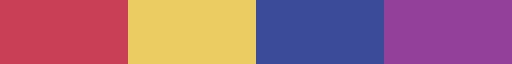

In [46]:
cmap = load_cmap('Ernst', cmap_type='discrete', type_warning = False,reverse=True, keep=[True,False, False, True, False, True, False, True])
cmap = load_cmap('Bay', cmap_type='discrete', reverse=False, type_warning = False, keep=[False, True, True, True, True ])
cmap = load_cmap('BillyApple', cmap_type='discrete', reverse=True, type_warning = False, keep=[True, True, True, False, True ])
cmap = load_cmap('Bay', cmap_type='discrete', reverse=False, type_warning = False, keep=[False, True, True, True, True ])
cmap = load_cmap('Diamonds', cmap_type='discrete', reverse=False, type_warning = False, keep=[True, False, False, True, True, True, False,True, False ])
cmap = load_cmap('Klimt', cmap_type='discrete', reverse=False, type_warning = False, keep=[False, True, True, False, True, True ])
cmap

In [53]:
cmap.colors

['#C93F55FF', '#EACC62FF', '#3C4B99FF', '#924099FF']

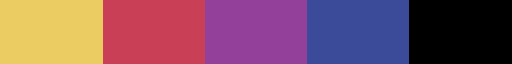

In [98]:
# Customise colour palette
import matplotlib.colors as mcolors

colors = ['#EACC62FF', '#C93F55FF', '#924099FF', '#3C4B99FF', '#000000']
cmap_new = mcolors.ListedColormap(colors)
cmap_new

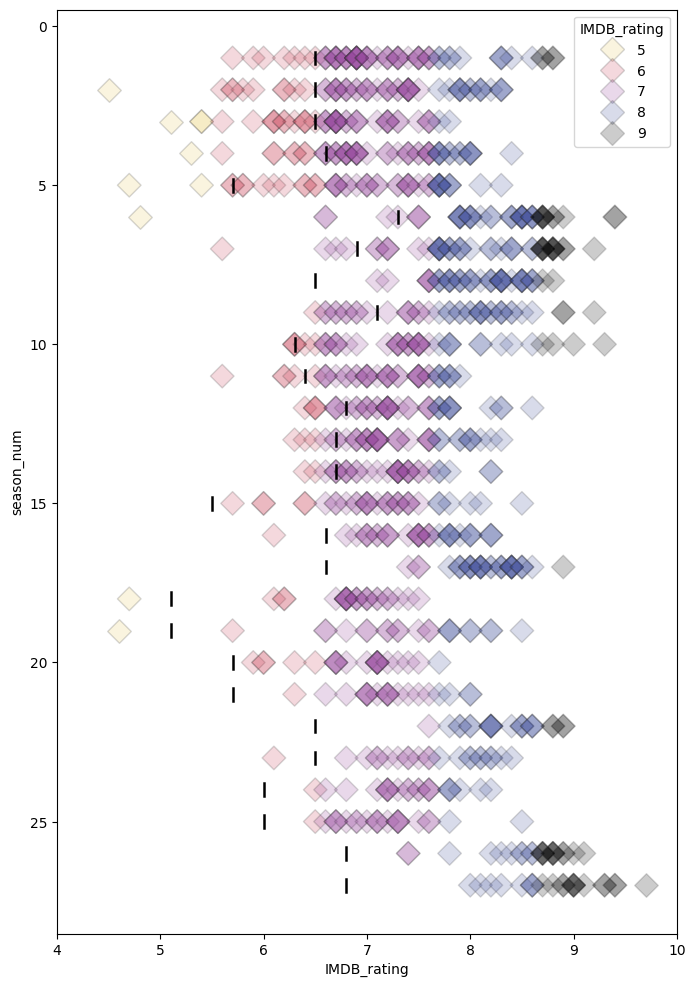

In [111]:
# setup fig
fig, ax = plt.subplots(figsize=(8,12))

# plot episode ratings
ax = sns.stripplot(
    data=df, x="IMDB_rating", y="season_num", 
    hue="IMDB_rating",
    jitter=False, s=12, marker="D", linewidth=1, alpha=.2, native_scale=True,
    palette=cmap_new, edgecolor="#333333",
    #vmin=5, vmax=10, 
    zorder=1,
    legend=True
)

# plot season ratings
subset = df[["season_num", "IMDB_rating_season"]].drop_duplicates().reset_index(drop=True)
#ax.scatter(y=subset["season_num"], x=subset["IMDB_rating_season"], zorder=3, 
#           marker="o", s=20,
#           color="black", edgecolors="white", linewidths=0)

for i in range(len(subset)):
    ax.plot([subset["IMDB_rating_season"][i],subset["IMDB_rating_season"][i]],
            [subset["season_num"][i]+0.2, subset["season_num"][i]-0.2],
            linewidth=1.8, color="black")

#subset = seasons[seasons["season_num"]<29]
#ax.scatter(y=subset["season_num"], x=subset["IMDB_rating"])

ax.invert_yaxis()
ax.set_xlim(xmin=4, xmax=10)
#ax.axis("off")
plt.show()

In [69]:
df.describe()

,episode_num,IMDB_rating,total_votes,season_num,number_of_episodes,IMDB_rating_season
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,19.298588,7.450054,155.446254,11.583062,37.144408,6.420304
std,12.639521,0.804554,155.395175,7.584731,11.208003,0.516479
min,0.000000,4.500000,19.000000,1.000000,20.000000,5.100000
25%,9.000000,6.900000,40.000000,5.000000,32.000000,6.300000
50%,18.000000,7.400000,55.000000,11.000000,38.000000,6.500000
75%,28.000000,8.000000,272.000000,17.000000,45.000000,6.700000
max,60.000000,9.700000,687.000000,27.000000,60.000000,7.300000


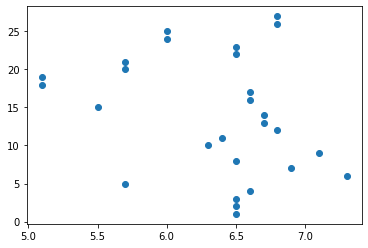

In [44]:
subset  = df[["season_num", "IMDB_rating_season"]].drop_duplicates().reset_index(drop=True)
plt.scatter(y=subset["season_num"], x=subset["IMDB_rating_season"])

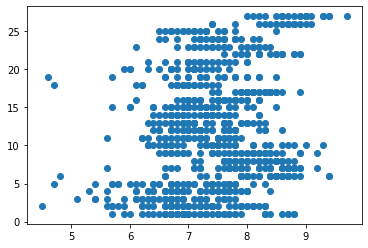

In [55]:
#subset  = df[["season_num", "IMDB_rating_season"]].drop_duplicates().reset_index(drop=True)
plt.scatter(y=df["season_num"], x=df["IMDB_rating"])

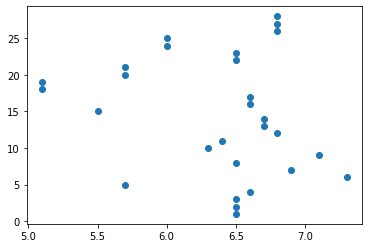

In [51]:
subset = seasons[seasons["season_num"]<29]
plt.scatter(y=subset["season_num"], x=subset["IMDB_rating"])